# Task 2 Main flow 
# Project 1 Exploratory Data Analysis (EDA)

#  Dataset Selection

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'Global_Superstore(CSV).csv' with your file path if needed.
data = pd.read_csv('Global_Superstore(CSV).csv')

# Step 2: Explore the dataset
print("\n--- First 5 rows of the dataset ---")
print(data.head())  # Display the first 5 rows

print("\n--- Summary of the dataset ---")
print(data.info())  # Overview of columns and data types

print("\n--- Statistical Summary ---")
print(data.describe())  # Statistical summary of numerical columns



--- First 5 rows of the dataset ---
   Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category

 # Clean Data

In [28]:
# Step 1: Check for missing values
# Define a function to check for missing values
def check_missing_values(data):
    print("\n--- Missing Values Check ---")
    missing = data.isnull().sum()
    print(missing[missing > 0])

check_missing_values(data)


--- Missing Values Check ---
Postal Code    806
dtype: int64


In [30]:
# Step 2: Handle duplicates
print("\n--- Checking for duplicates ---")
print(f"Number of duplicate rows: {data.duplicated().sum()}")



--- Checking for duplicates ---
Number of duplicate rows: 0


In [32]:
# 3 Remove duplicates if any
data = data.drop_duplicates()

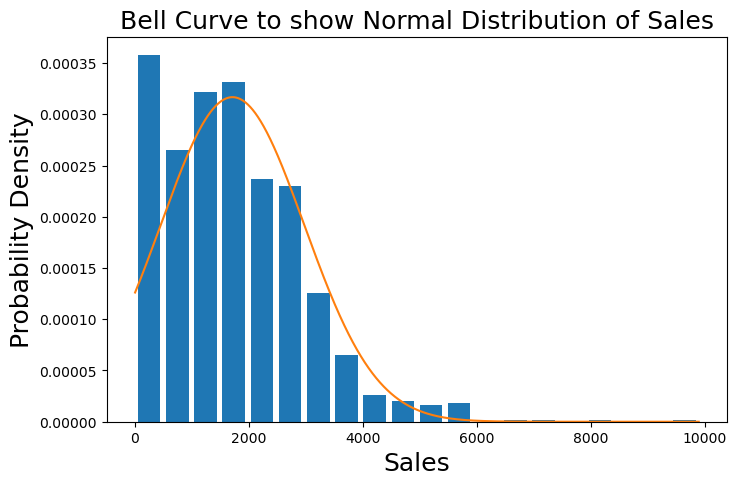

In [38]:
plt.figure(figsize=(8,5))

plt.hist(df.Sales, bins=20 , rwidth=.8 , density=True)
plt.xlabel('Sales', fontsize=18)
plt.ylabel('Probability Density' , fontsize=18)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.title('Bell Curve to show Normal Distribution of Sales', fontsize=18)

rng = np.arange(df['Sales'].min() , df['Sales'].max() , .1)
plt.plot(rng , norm.pdf(rng , df.Sales.mean() , df.Sales.std() ))

In [40]:
# Creating new column z-scores
df['z-scores'] = (df['Sales']  -  df['Sales'].mean()) / df['Sales'].std()

# Define bounds
lower_limit = df['Sales'].mean() - 3*df['Sales'].std()
upper_limit = df['Sales'].mean() + 3*df['Sales'].std()

# Find outliers
z_score_outliers = df[(df['Sales'] < lower_limit) | (df['Sales'] > upper_limit)]

print("Outliers in 'Sales' (using Z-scores Technique):")
z_score_outliers

Outliers in 'Sales' (using Z-scores Technique):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,z-scores
17,12069,ES-2015-PJ1883564-42255,9/8/2015,9/14/2015,Standard Class,PJ-1883564,Patrick Jones,Corporate,NaN,Prato,...,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,778.32,Low,4.961415
42,25795,IN-2015-VG2180558-42273,9/26/2015,9/28/2015,Second Class,VG-2180558,Vivek Grady,Corporate,NaN,Thiruvananthapuram,...,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",5667.87,13,0.0,2097.03,658.35,Medium,3.142293
43,16681,ES-2013-GT14710139-41621,12/13/2013,12/17/2013,Standard Class,GT-14710139,Greg Tran,Consumer,NaN,Huddersfield,...,Technology,Phones,"Motorola Smart Phone, Cordless",5785.02,9,0.0,404.73,656.73,High,3.235325
80,13879,ES-2015-HG1484545-42327,11/19/2015,11/23/2015,Standard Class,HG-1484545,Harry Greene,Consumer,NaN,Lille,...,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",5729.35,14,0.1,63.55,572.95,High,3.191116
215,27720,ID-2012-CA1196566-40949,2/10/2012,2/15/2012,Standard Class,CA-1196566,Carol Adams,Corporate,NaN,Fuji,...,Technology,Phones,"Samsung Smart Phone, VoIP",6998.64,11,0.0,2939.31,413.80,Medium,4.199098
313,23212,IN-2014-CA1277558-41802,6/12/2014,6/17/2014,Standard Class,CA-1277558,Cynthia Arntzen,Consumer,NaN,Kota,...,Technology,Phones,"Apple Smart Phone, with Caller ID",5751.54,9,0.0,2817.99,353.85,Medium,3.208738
419,40336,CA-2014-AB10105140-41991,12/18/2014,12/22/2014,Standard Class,AB-101051402,Adrian Barton,Consumer,48205.0,Detroit,...,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.37,498.70,Medium,6.497390
461,27407,IN-2012-Dp1324027-41223,11/10/2012,11/14/2012,Standard Class,Dp-1324027,Dean percer,Home Office,NaN,Suzhou,...,Technology,Phones,"Nokia Smart Phone, Cordless",5725.35,9,0.0,1602.99,302.61,Medium,3.187940
609,25263,IN-2013-CM1216027-41506,8/20/2013,8/24/2013,Standard Class,CM-1216027,Charles McCrossin,Consumer,NaN,Beijing,...,Technology,Phones,"Apple Smart Phone, Full Size",5737.50,9,0.0,630.99,261.87,Medium,3.197588
641,30958,IN-2014-AS1063092-41989,12/16/2014,12/20/2014,Standard Class,AS-1063092,Ann Steele,Home Office,NaN,Whakatane,...,Technology,Phones,"Motorola Smart Phone, Full Size",6439.80,10,0.0,2447.10,255.36,Medium,3.755306


In [42]:
# Removing outliers
df = df[abs(df['z-scores']) <= 3]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,z-scores
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,-1.182453
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,1.587013
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2.751025
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,0.938296
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,0.891005


In [44]:
# Removing z-score column
df = df.drop('z-scores', axis=1)

# Statistical Analysis

In [54]:
print("Statistical Analysis:")
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Standard Deviation:\n", df.std(numeric_only=True))
print("Correlation Matrix:\n", df.corr(numeric_only=True))

Statistical Analysis:
Mean:
 Row ID           25086.876768
Postal Code      53996.020725
Sales             1661.904121
Quantity             5.502020
Discount             0.093677
Profit             269.688182
Shipping Cost      270.335714
dtype: float64
Median:
 Row ID           25039.500
Postal Code      60623.000
Sales             1581.255
Quantity             5.000
Discount             0.000
Profit             186.295
Shipping Cost      257.200
dtype: float64
Standard Deviation:
 Row ID           12937.430031
Postal Code      33819.473208
Sales             1158.937833
Quantity             2.666023
Discount             0.149151
Profit             523.265243
Shipping Cost      174.962775
dtype: float64
Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.083464 -0.242424 -0.176497  0.033131 -0.054808   
Postal Code    0.083464     1.000000 -0.018663 -0.025725  0.066044 -0.081145   
Sales         -0.242424   

# Data Visualization

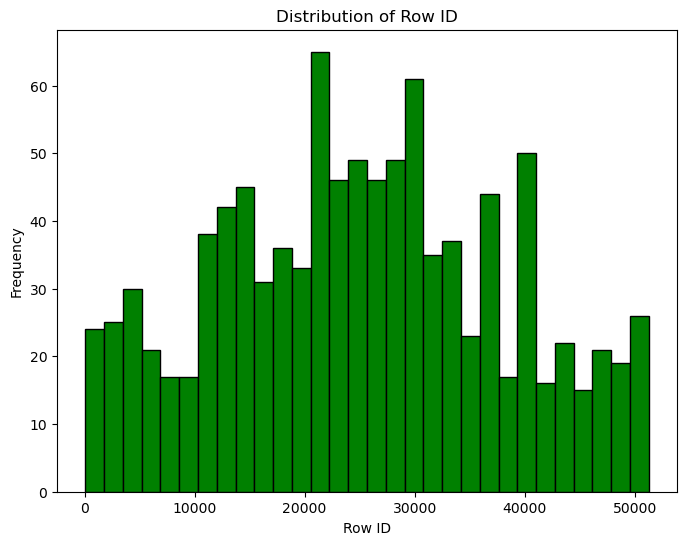

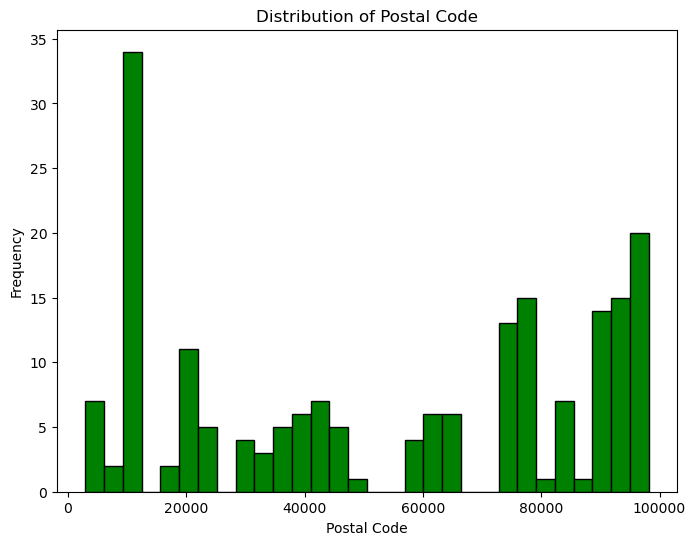

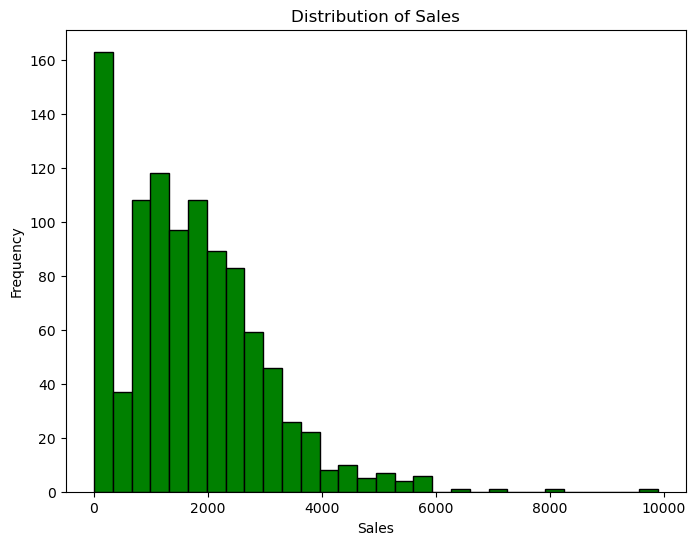

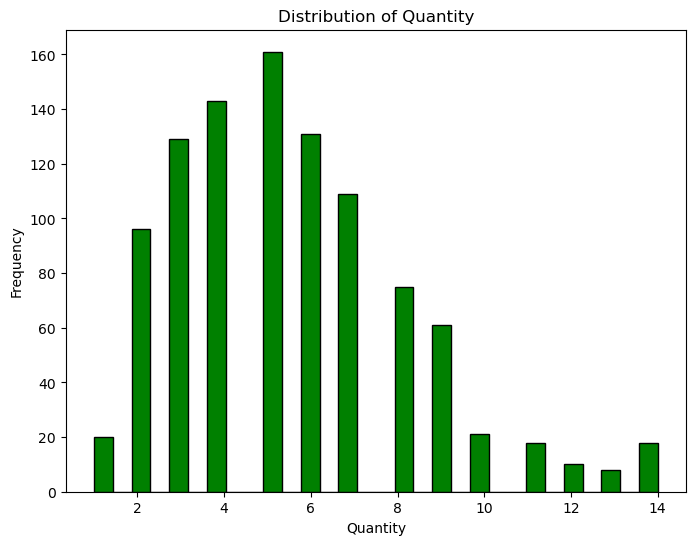

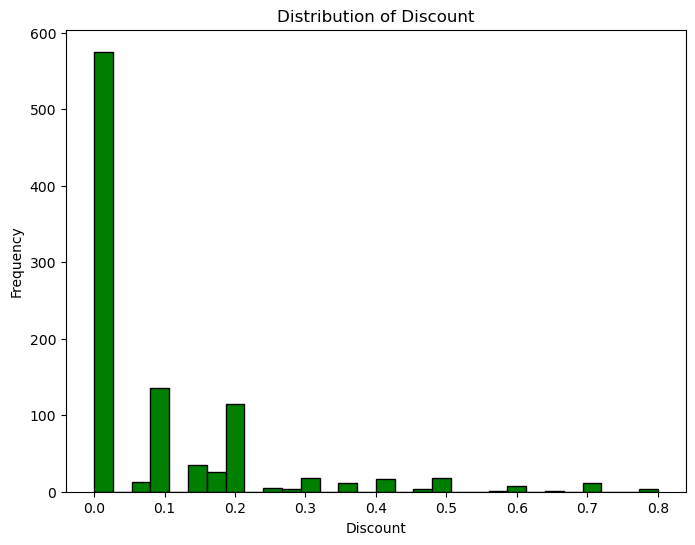

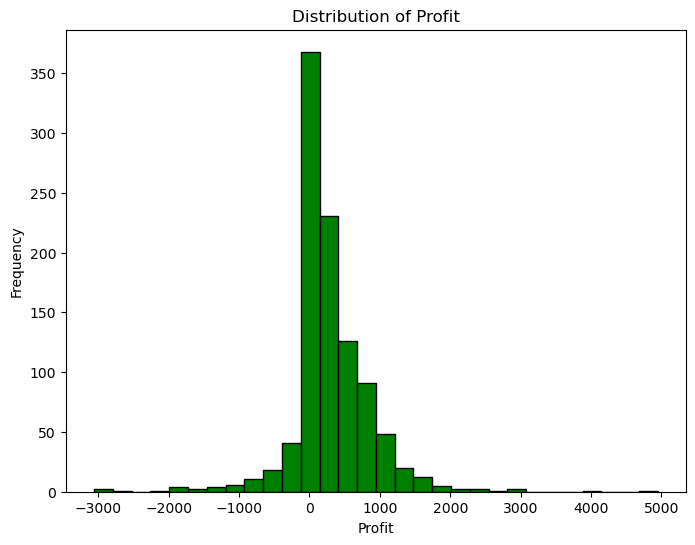

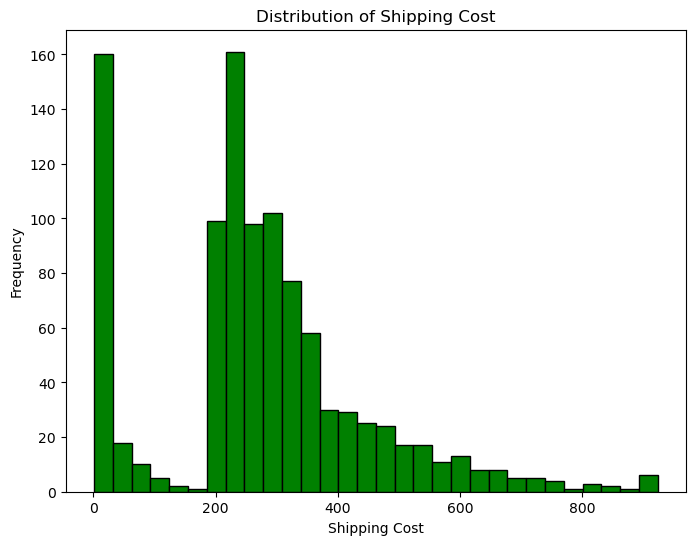

In [81]:
# Histograms for numerical data
def plot_histograms(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(data[col], bins=30, color='green', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms(data)

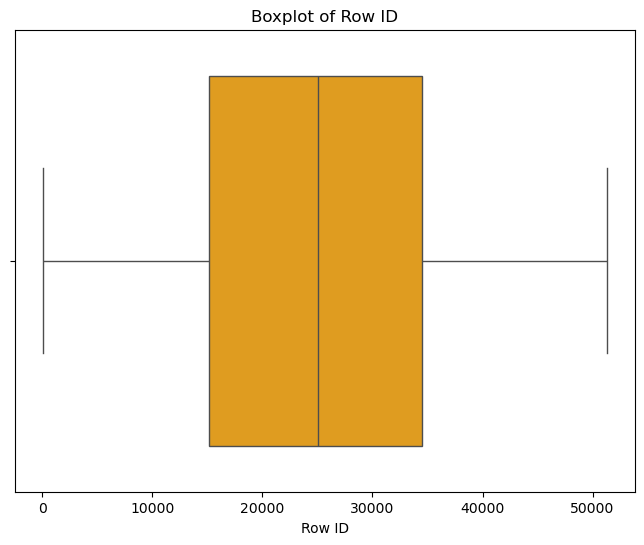

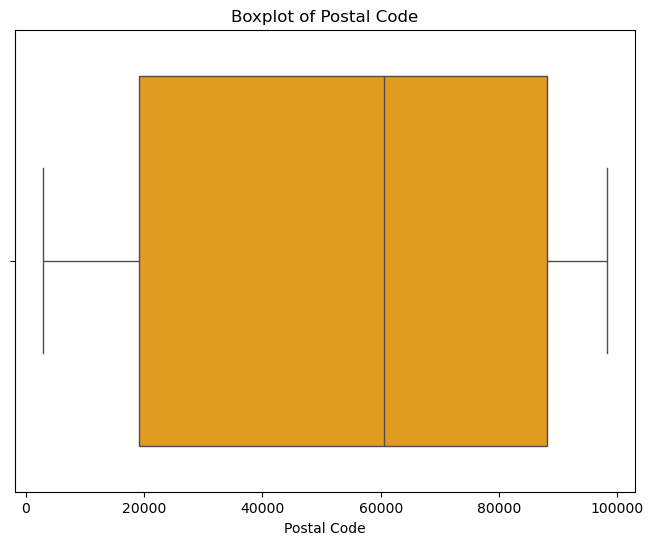

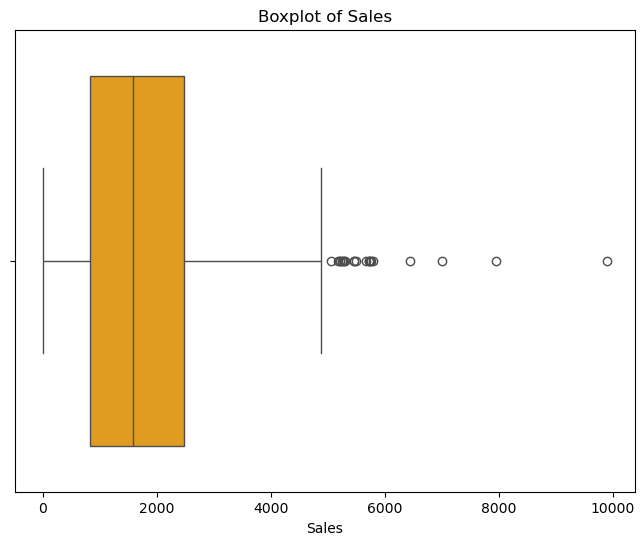

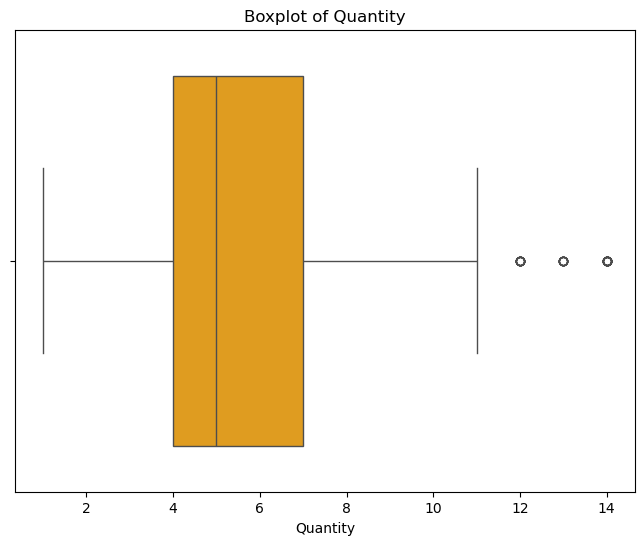

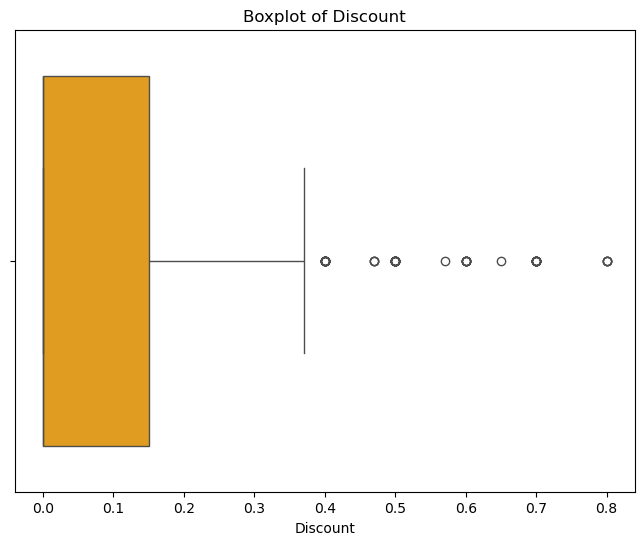

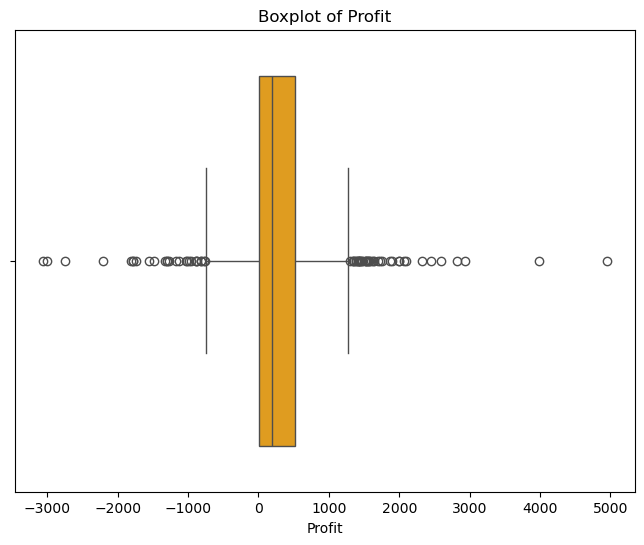

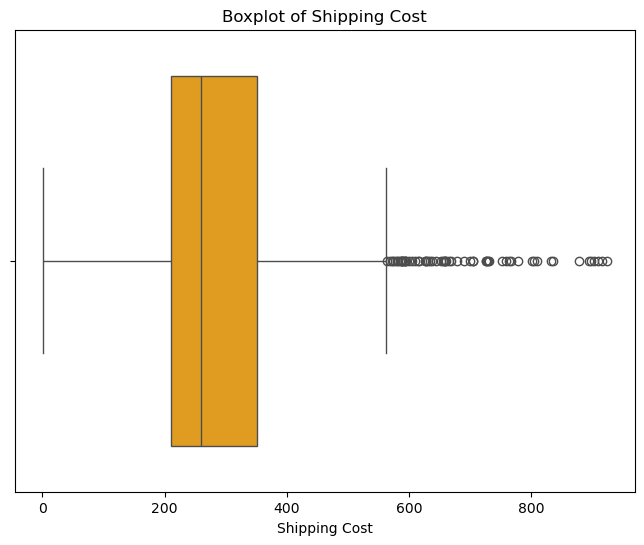

In [83]:
# Boxplots to identify outliers
def plot_boxplots(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[col], color='orange')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

plot_boxplots(data)

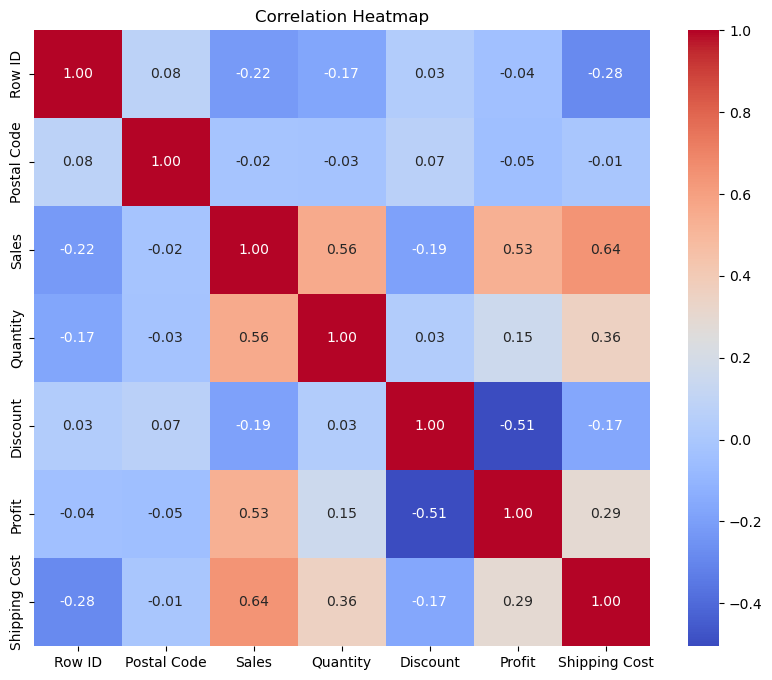

In [91]:
# Heatmap for correlations
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Ensure numeric_data is defined again
if numeric_data.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

#  Project 2: Sales Performance Analysis

#  Dataset Selection
# Loadand Explore the Dataset:

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and Explore the Dataset
# Replace 'sales_data.csv' with your file path if needed.
data = pd.read_csv('sales_data.csv')

print("\n--- First 5 rows of the dataset ---")
print(data.head())

print("\n--- Dataset Summary ---")
print(data.info())

print("\n--- Statistical Summary ---")
print(data.describe())



--- First 5 rows of the dataset ---
   Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category

#  DataCleaning

In [101]:
# Step 2: Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

# Check and fill missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())

data['Sales'] = data['Sales'].fillna(data['Sales'].median())
data['Profit'] = data['Profit'].fillna(data['Profit'].median())
data['Discount'] = data['Discount'].fillna(data['Discount'].mean())



--- Missing Values ---
Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64


In [105]:
# Fill missing values using appropriate strategies like the mean or median
# Postal Code is having 806 missing values therefore filling them with mean

print('\nNumber of missing values in Postal Code : ', df['Postal Code'].isnull().sum())
print('\nPostal Code before filling missing values : \n', df['Postal Code'].head())

df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())

print('\n\nPostal Code after filling missing values : \n', df['Postal Code'].head())


Number of missing values in Postal Code :  797

Postal Code before filling missing values : 
 0    73120.0
1        NaN
2        NaN
3        NaN
4        NaN
Name: Postal Code, dtype: float64


Postal Code after filling missing values : 
 0    73120.000000
1    53996.020725
2    53996.020725
3    53996.020725
4    53996.020725
Name: Postal Code, dtype: float64


#  Exploratory Data Analysis

In [112]:
# Convert the Date column to a datetime object for trend analysis
print('\nDatatypes of date columns  ')
print('Order Date : ',df['Order Date'].dtypes)
print('Ship Date : ',df['Order Date'].dtypes)

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print('\nConverting datatypes of date columns  ')
print('Order Date : ',df['Order Date'].dtypes)
print('Ship Date : ',df['Ship Date'].dtypes)


Datatypes of date columns  
Order Date :  object
Ship Date :  object

Converting datatypes of date columns  
Order Date :  datetime64[ns]
Ship Date :  datetime64[ns]


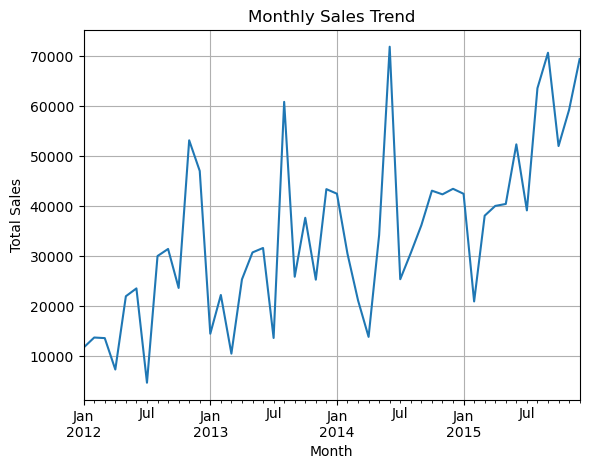

In [135]:
# Time series graphs to observe trends in Sales over time
 
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True) 

plt.show()

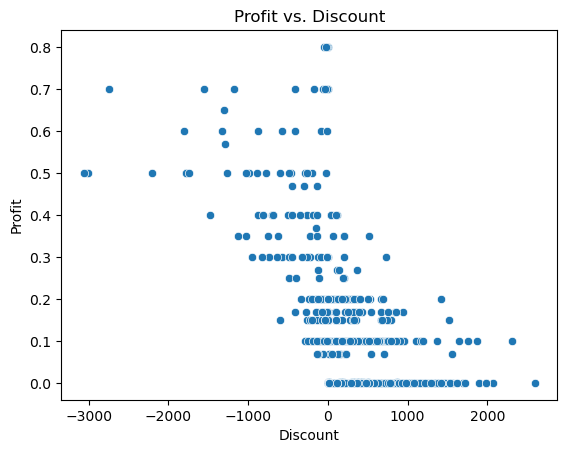

In [116]:
# Scatter plots to study the relationship between Profit and Discount

sns.scatterplot(x='Profit', y='Discount', data=df)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

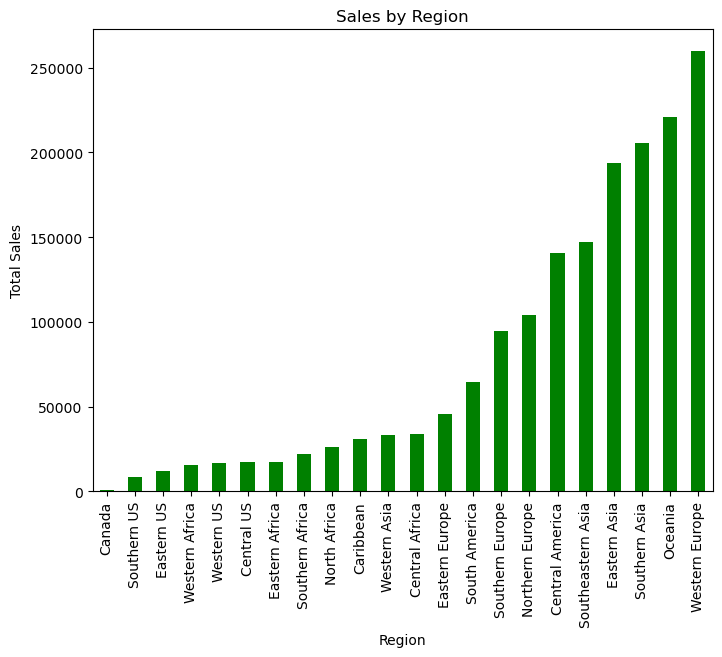

In [118]:
 #. Bar Plot for Sales by Region and Category
if 'Region' in data.columns and 'Sales' in data.columns:
    region_sales = data.groupby('Region')['Sales'].sum().sort_values()
    plt.figure(figsize=(8, 6))
    region_sales.plot(kind='bar', color='green')
    plt.title('Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.show()

# Predictive Modeling

In [121]:
# Predictive Modeling
# Prepare data for Linear Regression
features = ['Profit', 'Discount']
X = data[features]
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 5: Insights and Recommendations
print("\n--- Insights and Recommendations ---")
print("1. Optimal discount rates can boost profits without significant loss in sales.")
print("2. Focus marketing efforts on top-performing regions and categories.")
print("3. Regularly analyze sales trends to anticipate seasonal demand.")



--- Model Evaluation ---
Mean Squared Error: 768263.97
R-squared: 0.39

--- Insights and Recommendations ---
1. Optimal discount rates can boost profits without significant loss in sales.
2. Focus marketing efforts on top-performing regions and categories.
3. Regularly analyze sales trends to anticipate seasonal demand.
